# CS228 Python Numpy Tutorial

Adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

## Numpy

Numpy는 파이썬이 계산과학분야에 이용될때 핵심 역할을 하는 라이브러리입니다. Numpy는 고성능의 다차원 배열 객체와 이를 다룰 도구를 제공합니다. 만약 MATLAB에 익숙한 분이라면 Numpy 학습을 시작하는데 있어 이 [튜토리얼](http://wiki.scipy.org/NumPy_for_Matlab_Users)이 유용할 것입니다.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

### Arrays

Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 것입니다. 각각의 값들은 튜플(이때 튜플은 양의 정수만을 요소값으로 갖습니다.) 형태로 색인 됩니다. rank는 배열이 몇 차원인지를 의미합니다; shape는 는 각 차원의 크기를 알려주는 정수들이 모인 튜플입니다.

파이썬의 리스트를 중첩해 Numpy 배열을 초기화 할 수 있고, 대괄호를 통해 각 요소에 접근할 수 있습니다:

In [5]:
a = np.array([1,2,3])
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5
print(a)


(<type 'numpy.ndarray'>, (3,), 1, 2, 3)
[5 2 3]


In [4]:
b = np.array( [ [1,2,3] , [4,5,6] ] )
print(b)

[[1 2 3]
 [4 5 6]]


In [6]:
print(b.shape)

(2, 3)


리스트의 중첩이 아니더라도 Numpy는 배열을 만들기 위한 다양한 함수를 제공합니다.

In [8]:
# Create an array of all zeros
a = np.zeros((3,2))
print(a)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [10]:
# Create an array of all ones
a = np.ones((2,3))
print(a)

[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [11]:
# Create a constant array
print(np.full( (2,2) , 7  ))

[[7 7]
 [7 7]]


In [12]:
# Create a 2x2 identity matrix
print(np.eye(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [13]:
# Create an array filled with random values
print(np.random.randn(2,2))

[[ 0.34994381  0.73336697]
 [-0.72764815 -0.22310465]]


### Array indexing

Numpy는 배열을 인덱싱하는 몇 가지 방법을 제공합니다.

슬라이싱: 파이썬 리스트와 유사하게, Numpy 배열도 슬라이싱이 가능합니다. Numpy 배열은 다차원인 경우가 많기에, 각 차원별로 어떻게 슬라이스할건지 명확히 해야 합니다:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([ [1,2,3,4],[5,6,7,8],[9,10,11,12] ])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[ 0:2 , 1:3  ]
print b

슬라이싱된 배열은 원본 배열과 같은 데이터를 참조합니다, 즉 슬라이싱된 배열을 수정하면 원본 배열 역시 수정됩니다.

In [16]:
#### a
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
print a[0, 1]  
### b
# [[2 3]
#  [6 7]]
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print a[0, 1] 

2
77


정수를 이용한 인덱싱과 슬라이싱을 혼합하여 사용할 수 있습니다. 하지만 이렇게 할 경우, 기존의 배열보다 낮은 rank의 배열이 얻어집니다. 이는 MATLAB이 배열 슬라이싱을 다루는 방식과 차이가 있습니다.

In [17]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


배열의 중간 행에 접근하는 두 가지 방법이 있습니다. 정수 인덱싱과 슬라이싱을 혼합해서 사용하면 낮은 rank의 배열이 생성되지만, 슬라이싱만 사용하면 원본 배열과 동일한 rank의 배열이 생성됩니다.

In [21]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print row_r1, row_r1.shape 
print row_r2, row_r2.shape
print row_r3, row_r3.shape

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [23]:
# We can make the same distinction when accessing columns of an array:
#[[ 1  2  3  4]
# [ 5  6  7  8]
# [ 9 10 11 12]]
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print col_r1, col_r1.shape
print
print col_r2, col_r2.shape

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


정수 배열 인덱싱: Numpy 배열을 슬라이싱하면, 결과로 얻어지는 배열은 언제나 원본 배열의 부분 배열입니다. 그러나 정수 배열 인덱싱을 한다면, 원본과 다른 배열을 만들 수 있습니다. 여기에 예시가 있습니다:

In [26]:
a = np.array([[1,2], [3, 4], [5, 6]])
#[[1 2]
# [3 4]
# [5 6]]
# An example of integer array indexing.
# The returned array will have shape (3,) and 
print a[  [0, 1, 2], [0, 1, 0]   ]

# The above example of integer array indexing is equivalent to this:
print np.array([  a[0, 0], a[1, 1], a[2, 0]    ])

[1 4 5]
[1 4 5]


In [27]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print a[[0, 0], [1, 1]]

# Equivalent to the previous integer array indexing example
print np.array([a[0, 1], a[0, 1]])

[2 2]
[2 2]


정수 배열 인덱싱을 유용하게 사용하는 방법 중 하나는 행렬의 각 행에서 하나의 요소를 선택하거나 바꾸는 것입니다:

In [28]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [29]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
#  a[[0,1,2,3], [0, 2, 0, 1]]
print a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [30]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print a

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


불리언 배열 인덱싱: 불리언 배열 인덱싱을 통해 배열 속 요소를 취사선택할 수 있습니다. 불리언 배열 인덱싱은 특정 조건을 만족하게 하는 요소만 선택하고자 할 때 자주 사용됩니다. 다음은 그 예시입니다:

In [32]:
a = np.array([[1,2], [3, 4], [5, 6]])
#[[1 2]
# [3 4]
# [5 6]]
bool_idx = (a>2)

print bool_idx

[[False False]
 [ True  True]
 [ True  True]]


In [34]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a>2])

[3 4 5 6]
[3 4 5 6]


튜토리얼을 간결히 하고자 numpy 배열 인덱싱에 관한 많은 내용을 생략했습니다. 조금 더 알고싶다면 [문서](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)를 참조하세요.

### Datatypes

Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 것입니다. Numpy에선 배열을 구성하는 데 사용할 수 있는 다양한 숫자 자료형을 제공합니다. Numpy는 배열이 생성될 때 자료형을 스스로 추측합니다, 그러나 배열을 생성할 때 명시적으로 특정 자료형을 지정할 수도 있습니다. <br>

예시:

In [37]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.float64 )  # Force a particular datatype

print x.dtype, y.dtype, z.dtype

int64 float64 float64


Numpy 자료형에 관한 자세한 사항은 [문서](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)를 참조하세요.

### Array math

기본적인 수학함수는 배열의 각 요소별로 동작하며 연산자를 통해 동작하거나 numpy 함수모듈을 통해 동작합니다:

In [39]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x);print(y)
# Elementwise sum; both produce the array
print(x+y)
print(np.add(x,y))

[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]
[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [40]:
# Elementwise difference; both produce the array
"""
[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]
"""
print(x-y)
print(np.subtract(x,y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [48]:
# Elementwise product; both produce the array
"""
[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]
"""
print(x*y)
print(np.multiply(x,y))
print(np.matmul(x,y))

[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]


In [44]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
"""
[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]
"""
print(x/y)
print(np.divide(x,y)) 

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [45]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
#[[ 1.  2.]
# [ 3.  4.]]
print(np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


MATLAB과 달리, `*`은 행렬 곱이 아니라 요소별 곱입니다. Numpy에선 벡터의 내적, 벡터와 행렬의 곱, 행렬곱을 위해 `*` 대신 ‘dot’함수를 사용합니다. ‘dot’은 Numpy 모듈 함수로서도 배열 객체의 인스턴스 메소드로서도 이용 가능한 합수입니다:

In [49]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print(x)
print(y)
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v,w))

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
219
219


In [53]:
# Matrix / vector product; both produce the rank 1 array [29 67]
#x : [[1 2]
#     [3 4]]
#v: [9,10]
print x.dot(v)
print np.dot(x,v)

[29 67]
[29 67]


In [54]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x,y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy는 배열 연산에 유용하게 쓰이는 많은 함수를 제공합니다. 가장 유용한 건 ‘sum’입니다:

In [57]:
x = np.array([[1,2],[3,4]])
#[[1 2]
# [3 4]]
print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


Numpy가 제공하는 모든 수학함수의 목록은 [문서](http://docs.scipy.org/doc/numpy/reference/routines.math.html)를 참조하세요.

배열연산을 하지 않더라도, 종종 배열의 모양을 바꾸거나 데이터를 처리해야 할 때가 있습니다. 가장 간단한 예는 행렬의 주 대각선을 기준으로 대칭되는 요소끼리 뒤바꾸는 것입니다; 이를 전치라고 하며 행렬을 전치하기 위해선, 간단하게 배열 객체의 ‘T’ 속성을 사용하면 됩니다:

In [59]:
print x
print x.T

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [64]:
v = np.array([  [1,2,3]  ])
print(v.shape)
print v 
print v.T

(1, 3)
[[1 2 3]]
[[1]
 [2]
 [3]]


Numpy는 배열을 다루는 다양한 함수들을 제공합니다; 이러한 함수의 전체 목록은 [문서](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)를 참조하세요.

### Broadcasting

브로트캐스팅은 Numpy에서 shape가 다른 배열 간에도 산술 연산이 가능하게 하는 메커니즘입니다. 종종 작은 배열과 큰 배열이 있을 때, 큰 배열을 대상으로 작은 배열을 여러 번 연산하고자 할 때가 있습니다. 

예를 들어, 행렬의 각 행에 상수 벡터를 더하는 걸 생각해보세요. 이는 다음과 같은 방식으로 처리될 수 있습니다:

In [67]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
#[[ 1  2  3]
# [ 4  5  6]
# [ 7  8  9]
# [10 11 12]]
v = np.array([1, 0, 1])
y = np.zeros((4,3))   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print y

[[  2.   2.   4.]
 [  5.   5.   7.]
 [  8.   8.  10.]
 [ 11.  11.  13.]]


위의 방식이 동작은 합니다; 그러나 `x`가 매우 큰 행렬이라면, 파이썬의 명시적 반복문을 이용한 위 코드는 매우 느려질 수 있습니다. 벡터 `v`를 행렬 `x`의 각 행에 더하는 것은 `v`를 여러 개 복사해 수직으로 쌓은 행렬 `vv`를 만들고 이 `vv`를 `x`에 더하는것과 동일합니다. 이 과정을 아래의 코드로 구현할 수 있습니다:

In [68]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print vv                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [69]:
y = x + vv  # Add x and vv elementwise
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy 브로드캐스팅을 이용한다면 이렇게 v의 복사본을 여러 개 만들지 않아도 동일한 연산을 할 수 있습니다. 아래는 브로드캐스팅을 이용한 예시 코드입니다:

In [82]:
%%script false
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print y

`x`의 shape가 `(4, 3)`이고 `v`의 shape가 `(3,)`라도 브로드캐스팅으로 인해 `y = x + v`는 문제없이 수행됩니다; 이때 `v`는 `v`의 복사본이 차곡차곡 쌓인 shape `(4, 3)`처럼 간주되어 `x`와 동일한 shape가 되며 이들 간의 요소별 덧셈연산이 `y`에 저장됩니다.

두 배열의 브로드캐스팅은 아래의 규칙을 따릅니다:

1. 두 배열이 동일한 rank를 가지고 있지 않다면, 낮은 rank의 1차원 배열이 높은 rank 배열의 shape로 간주합니다.
2. 특정 차원에서 두 배열이 동일한 크기를 갖거나, 두 배열 중 하나의 크기가 1이라면 그 두 배열은 특정 차원에서 compatible하다고 여겨집니다.
3. 두 행렬이 모든 차원에서 compatible하다면, 브로드캐스팅이 가능합니다.
4. 브로드캐스팅이 이뤄지면, 각 배열 shape의 요소별 최소공배수로 이루어진 shape가 두 배열의 shape로 간주합니다.
5. 차원에 상관없이 크기가 1인 배열과 1보다 큰 배열이 있을 때, 크기가 1인 배열은 자신의 차원 수만큼 복사되어 쌓인 것처럼 간주합니다.

설명이 이해하기 부족하다면 [scipy문서](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)나 [scipy위키](http://wiki.scipy.org/EricsBroadcastingDoc)를 참조하세요.

브로드캐스팅을 지원하는 함수를 universal functions라고 합니다. universal functions 목록은 [문서](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)를 참조하세요.

브로드캐스팅을 응용한 예시들입니다:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print np.reshape(v, (3, 1)) * w

In [74]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x)
print(x.shape)
xx = np.reshape(x, (3,4))
print(xx)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print x + v

In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print (x.T + w).T

In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print x + np.reshape(w, (2, 1))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print x * 2

브로드캐스팅은 보통 코드를 간결하고 빠르게 해줍니다, 그러니 가능한 많이 사용하세요.

이 문서는 여러분이 numpy에 대해 알아야할 많은 중요한 사항들을 다루지만 완벽하진 않습니다. numpy에 관한 더 많은 사항은 [numpy 레퍼런스](http://docs.scipy.org/doc/numpy/reference/)를 참조하세요.

## Matplotlib

Matplotlib는 plotting 라이브러리입니다. 이번에는 MATLAB의 plotting 시스템과 유사한 기능을 제공하는 `matplotlib.pyplot` 모듈에 관한 간략한 소개가 있겠습니다.,

In [75]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [83]:
%matplotlib inline

### Plotting

`matplotlib`에서 가장 중요한 함수는 2차원 데이터를 그릴 수 있게 해주는 plot입니다. 여기 간단한 예시가 있습니다:

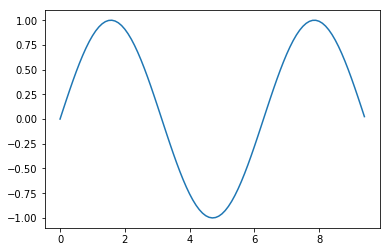

In [84]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0,3*np.pi,0.1)
y = np.sin(x)
#print(x)
#print(y)

# Plot the points using matplotlib
plt.plot(x,y)
#plt.show()

약간의 몇 가지 추가적인 작업을 통해 여러 개의 그래프와 제목, 범주, 축 이름을 한 번에 쉽게 나타낼 수 있습니다:

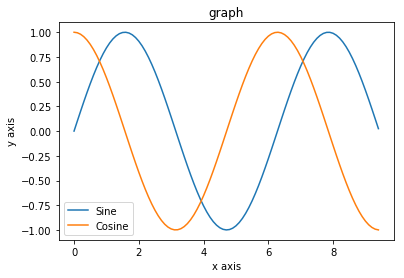

In [89]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x,y_sin)
#plt.figure()
plt.plot(x,y_cos)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('graph')
plt.legend(['Sine','Cosine'])

`plot`함수에 관한 더 많은 내용은 [문서](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)를 참조하세요.

### Subplots 

'subplot’함수를 통해 다른 내용도 동일한 그림 위에 나타낼 수 있습니다. 여기 간단한 예시가 있습니다:

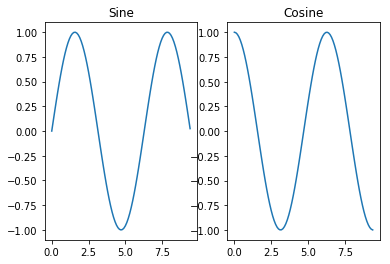

In [92]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(121)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(122)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

subplot함수에 관한 더 많은 내용은 [문서](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)를 참조하세요.

***
# 수고하셨습니다